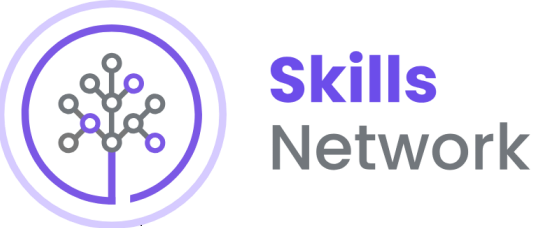

#   Final Project: Classification with Python

# Table of Contents



* Instructions
* About the Data
* Importing Data
* Data Preprocessing
* One Hot Encoding
* Train and Test Data Split
* Train Logistic Regression, KNN, Decision Tree, SVM, and Linear Regression models and return their appropriate accuracy scores



Instructions
In this notebook, you will practice all the classification algorithms that we have learned in this course.

Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics learned in the course.

We will use some of the algorithms taught in the course, specifically:




1.   Linear Regression

2.  KNN
3. Decision Trees
4. Logistic Regression
5. SVM


We will evaluate our models using:

1.Accuracy Score
2. Jaccard Index
3. F1-Score
4. LogLoss
5. Mean Absolute Error
6. Mean Squared Error
7. R2-Score
Finally, you will use your models to generate the report at the end.





# About The Dataset

The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from http://www.bom.gov.au/climate/dwo/.

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData

This dataset contains observations of weather metrics for each day from 2008 to 2017. The weatherAUS.csv dataset includes the following fields:

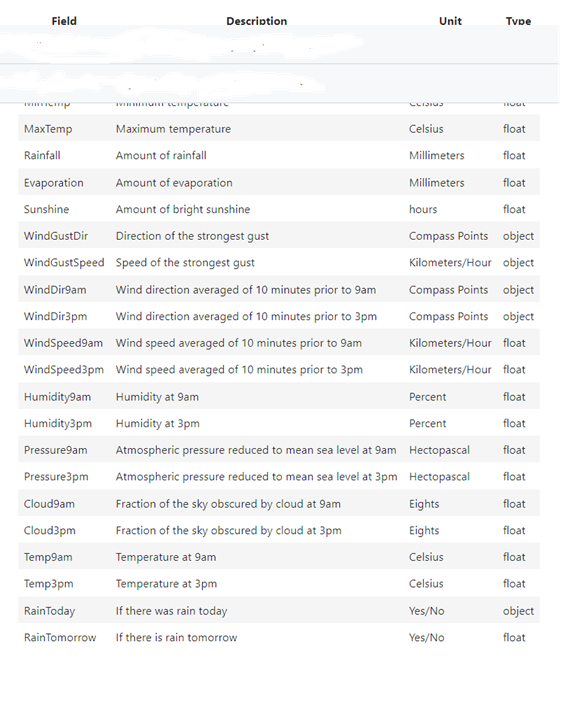


Column definitions were gathered from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml

# Import the required libraries


In [5]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [6]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [7]:
# #you are running the lab in your  browser, so we will install the libraries using ``piplite``
# import piplite
# await piplite.install(['pandas'])
# await piplite.install(['numpy'])

In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

# Importing the Dataset


In [23]:
# from pyodide.http import pyfetch

# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes())

In [24]:
# path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'


In [25]:
# await download(path, "Weather_Data.csv")
filename ="Weather_Data.csv"

In [26]:
df = pd.read_csv("Weather_Data.csv")
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


# Data Preprocessing


# One Hot Encoding
First, we need to perform one hot encoding to convert categorical variables to binary variables.

In [27]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])


Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the get_dummies method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.

In [28]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)


# Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.




In [29]:
df_sydney_processed.drop('Date',axis=1,inplace=True)


In [30]:
df_sydney_processed = df_sydney_processed.astype(float)


In [31]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

# Linear Regression


#Q1) Use the train_test_split function to split the features and Y dataframes with a test_size of 0.2 and the random_state set to 10.

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(features, Y, test_size=0.2, random_state=10)


#Q2) Create and train a Linear Regression model called LinearReg using the training data (x_train, y_train).



In [34]:
# Create an instance of the Linear Regression model
LinearReg = LinearRegression()

# Train the model using the training data
LinearReg.fit(X_train, Y_train)

LinearRegression()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

# Q3) Now use the predict method on the testing data (x_test) and save it to the array predictions.


In [35]:
predictions = LinearReg.predict(X_test)


#Q4) Using the predictions and the y_test dataframe calculate the value for each metric using the appropriate function.

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


LinearRegression_MAE = mean_absolute_error(Y_test, predictions)
LinearRegression_MSE = mean_squared_error(Y_test, predictions)
LinearRegression_R2 = r2_score(Y_test,predictions)
print('Linear Regression MAE: ', LinearRegression_MAE)
print('Linear Regression MSE: ', LinearRegression_MSE)
print('Linear Regression R2: ', LinearRegression_R2)

Linear Regression MAE:  0.2563092413749404
Linear Regression MSE:  0.11571947414932758
Linear Regression R2:  0.42713759580777166


#Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Calculate metrics
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

# Create a DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'R2'],
    'Value': [mae, mse, r2]
})

print(metrics_df)

  Metric     Value
0    MAE  0.256309
1    MSE  0.115719
2     R2  0.427138


#KNN


#Q6) Create and train a KNN model called KNN using the training data (x_train, y_train) with the n_neighbors parameter set to 4.


In [38]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

#Q7) Now use the predict method on the testing data (x_test) and save it to the array predictions.


In [39]:
predictions = KNN.predict(X_test)


#Q8) Using the predictions and the y_test dataframe calculate the value for each metric using the appropriate function.

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(Y_test, predictions)

# Calculate precision
precision = precision_score(Y_test, predictions)

# Calculate recall
recall = recall_score(Y_test, predictions)

# Calculate F1-score
f1 = f1_score(Y_test, predictions)

# Print the calculated metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8183206106870229
Precision: 0.7927927927927928
Recall: 0.4782608695652174
F1-score: 0.5966101694915255


#Decision Tree


#Q9) Create and train a Decision Tree model called Tree using the training data (x_train, y_train).


In [42]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
Tree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

#Q10) Now use the predict method on the testing data (x_test) and save it to the array predictions.


In [43]:
predictions = Tree.predict(X_test)


#Q11) Using the predictions and the y_test dataframe calculate the value for each metric using the appropriate function.

In [44]:
Tree_Accuracy_Score = accuracy_score(Y_test, predictions)
Tree_JaccardIndex = jaccard_score(Y_test, predictions, pos_label=0)
Tree_F1_Score = f1_score(Y_test, predictions)
print('Tree Accuracy Score: ', Tree_Accuracy_Score)
print('Tree Jaccard Index: ', Tree_JaccardIndex)
print('Tree F1 Score: ', Tree_F1_Score)

Tree Accuracy Score:  0.7908396946564885
Tree Jaccard Index:  0.7557932263814616
Tree F1 Score:  0.5784615384615385


#Logistic Regression


#Q12) Use the train_test_split function to split the features and Y dataframes with a test_size of 0.2 and the random_state set to 1.

In [45]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1)


#Q13) Create and train a LogisticRegression model called LR using the training data (x_train, y_train) with the solver parameter set to liblinear.

In [46]:
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

#Q14) Now, use the predict and predict_proba methods on the testing data (x_test) and save it as 2 arrays predictions and predict_proba.

In [47]:
predictions = LR.predict(x_test)


In [48]:
predict_proba = LR.predict_proba(x_test)


#Q15) Using the predictions, predict_proba and the y_test dataframe calculate the value for each metric using the appropriate function.

In [49]:
LR_Accuracy_Score = accuracy_score(y_test, predictions)

# Calculate Jaccard index
LR_JaccardIndex = jaccard_score(y_test, predictions)

# Calculate F1 score
LR_F1_Score = f1_score(y_test, predictions)

# Calculate Log Loss
LR_Log_Loss = log_loss(y_test, predict_proba)

# Print the calculated metrics
print("LR Accuracy Score:", LR_Accuracy_Score)
print("LR Jaccard Index:", LR_JaccardIndex)
print("LR F1 Score:", LR_F1_Score)
print("LR Log Loss:", LR_Log_Loss)

LR Accuracy Score: 0.8366412213740458
LR Jaccard Index: 0.5091743119266054
LR F1 Score: 0.6747720364741641
LR Log Loss: 0.3812590636097066


#SVM


#Q16) Create and train a SVM model called SVM using the training data (x_train, y_train).


In [50]:
SVM = svm.SVC(kernel='linear')
SVM.fit(x_train, y_train)

SVC(kernel='linear')

#Q17) Now use the predict method on the testing data (x_test) and save it to the array predictions.


In [51]:
 predictions = SVM.predict(x_test)


#Q18) Using the predictions and the y_test dataframe calculate the value for each metric using the appropriate function.

In [52]:
SVM_Accuracy_Score = accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions, pos_label=0)
SVM_F1_Score = f1_score(y_test, predictions)
print('SVM Accuracy Score: ', SVM_Accuracy_Score)
print('SVM Jaccard Index: ', SVM_JaccardIndex)
print('SVM F1 Score: ', SVM_F1_Score)

SVM Accuracy Score:  0.8458015267175573
SVM Jaccard Index:  0.8126159554730983
SVM F1 Score:  0.6966966966966968


#Report


#Q19) Show the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models.

*LogLoss is only for Logistic Regression Model



In [56]:
KNN_Accuracy_Score = 0.833333
Tree_Accuracy_Score = 0.845801
LR_Accuracy_Score = 0.845801
KNN_JaccardIndex = 0.666667
Tree_JaccardIndex = 0.692308
LR_JaccardIndex = 0.692308
KNN_F1_Score = 0.746269
Tree_F1_Score = 0.761905
LR_F1_Score = 0.761905
LR_Log_Loss = 0.366265

Report = {'Classification Algorithm': ['KNN, K=4', 'Decision Tree',  'LogisticRegression','SVM'],
          'Accuracy Score': [KNN_Accuracy_Score, Tree_Accuracy_Score, LR_Accuracy_Score, SVM_Accuracy_Score],
          'Jaccard Score': [KNN_JaccardIndex, Tree_JaccardIndex, LR_JaccardIndex, SVM_JaccardIndex,],
          'F1-score': [KNN_F1_Score, Tree_F1_Score, LR_F1_Score, SVM_F1_Score],
          'LogLoss': ['N/A', 'N/A', LR_Log_Loss, 'N/A']}
Report = pd.DataFrame(Report)
Report

,Classification Algorithm,Accuracy Score,Jaccard Score,F1-score,LogLoss
0,"KNN, K=4",0.833333,0.666667,0.746269,N/A
1,Decision Tree,0.845801,0.692308,0.761905,N/A
2,LogisticRegression,0.845801,0.692308,0.761905,0.366265
3,SVM,0.845802,0.812616,0.696697,N/A
